# <font style="color:green">Trabalho da Disciplina de Processamento Digital de Imagens (Segunda Parte)</font>

O presente trabalho visa demonstrar a junção de 2 imagens utilizando as bibliotecas numpy, e opencv. Para visualização do histograma, foi utilizado a biblioteca matplotlib.

# <font style="color:green">Documentações</font>

* Numpy: https://numpy.org/doc/stable/
* Matplotlib: https://matplotlib.org/3.5.1/index.html
* Opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html;

## Importando Bibliotecas

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Leitura e Impressão das imagens selecionadas

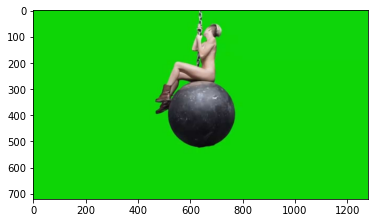

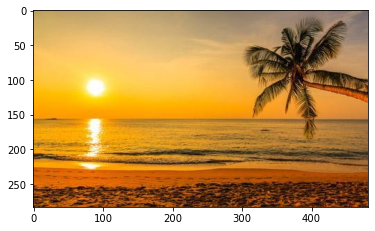

In [2]:
# Lendo as imagens selecionadas
img1 = cv.imread('imagens/miley.jpg')
img2 = cv.imread('imagens/Exemplo_fundo.jpg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Imprimindo
plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

## Função join_Image

In [3]:
def join_Images(foreground_Img, background_Img):
    # Função responsável em gerar uma máscara
    def generate_Mask(BGR_img):
        # Plota um histograma BGR que ajudará a identificar a dominância
        # dos tons de verde
        plt.figure()
        plt.title('BGR Histogram')
        plt.xlabel('Bins')
        plt.ylabel('# of pixels')
        
        colors = ('b', 'g', 'r')      
        
        for i, col in enumerate(colors):
            histogram_Img = cv.calcHist([BGR_img], [i], None, [256], [0, 256])
            
            plt.plot(histogram_Img, color = col)
            plt.xlim([0, 256])
            
        plt.show()
        
        # Converte uma imagem BGR em  HSV
        HSV_img = cv.cvtColor(BGR_img, cv.COLOR_BGR2HSV)
        
        plt.title('HSV Image')
        plt.imshow(HSV_img)
        plt.show()
        
        # Definindo os limites de cores com base no mapa de cores do sistema HSV
        lower_Green = np.array([35, 100, 100])
        upper_Green = np.array([75, 255, 255])
        
        # Gera uma máscara referente a cor verde (Se for detectado a cor verde,
        # será delimitada pela cor branca)
        green_Mask = cv.inRange(HSV_img, lower_Green, upper_Green)
        
        plt.title('Green Mask')
        plt.imshow(green_Mask, cmap = 'binary')
        plt.show()
        
        # Gera uma máscara inversa
        invert_Mask = 255 - green_Mask
        
        # Método responsável em ajustar as bordas da imagem
        def adjust_Edge_Image(img):
            img = cv.GaussianBlur(img, (0, 0), sigmaX = 2, sigmaY = 2, borderType = cv.BORDER_DEFAULT)
            img = (2 * (img.astype(np.float32)) - 255.0).clip(0, 255).astype(np.uint8)
            
            return img
        
        # Chamada do método adjust_Edge_Image
        invert_Mask = adjust_Edge_Image(invert_Mask)
        
        plt.title('Invert Mask')
        plt.imshow(invert_Mask)
        plt.imshow(invert_Mask, cmap = 'binary')
        plt.show()
        
        return invert_Mask

    # Chamada do método generate_Mask
    invert_Mask = generate_Mask(foreground_Img)
    
    # Método responsável em redimensionar a imagem de fundo, no caso
    def resize_Image(img):
        
        wight = 1280
        height = 720
        points = (wight, height)
        
        resized_img = cv.resize(img, points, interpolation = cv.INTER_LINEAR)
        
        return resized_img

    # Chamada do método resize_Image
    background_Img = resize_Image(background_Img)
    
    # Sequência de operações que ajudarão a inserir a imagem de fundo na 1a imagem
    
    # Substituindo a cor verde pela cor preta, dando um aspecto de que a
    # imagem esteja no fundo "transparente"
    foreground_Img = cv.bitwise_and(foreground_Img, foreground_Img, mask = invert_Mask)
    
    plt.title('Foreground Image')
    plt.imshow(foreground_Img)
    plt.show()
    
    plt.title('Resized Background image')
    plt.imshow(background_Img)
    plt.show()
    
    # Conversão impportante do tipo e espaço de cor. Tem-se objetivo de que
    # a imagem referente ao primeiro parâmetro da função join_Images tenha
    # fundo transparente, portanto, faz-se a conversão do espaço de cor
    # BGR para BGRA, e o tipo para float
    invert_Mask = cv.cvtColor(invert_Mask, cv.COLOR_BGR2BGRA).astype(float) / 255
    foreground_Img = cv.cvtColor(foreground_Img, cv.COLOR_BGR2BGRA).astype(float)
    background_Img = cv.cvtColor(background_Img, cv.COLOR_BGR2BGRA).astype(float)
    
    # Utilização do método multiply para que as imagens sejam agrupadas
    foreground_Img = cv.multiply(invert_Mask, foreground_Img)
    background_Img = cv.multiply(1.0 - invert_Mask, background_Img)
      
    # A imagem de primeiro plano é agrupada na imagem de fundo
    new_Image = cv.add(foreground_Img, background_Img) / 255
    
    # Escrita do resultado
    plt.title('New Image')
    plt.imshow(new_Image)
    plt.show()

## Chamada do método join_Images e saída

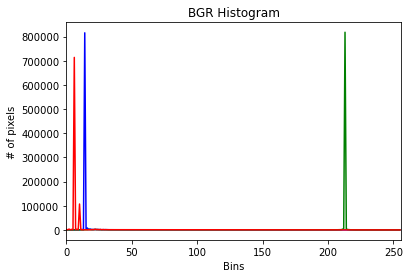

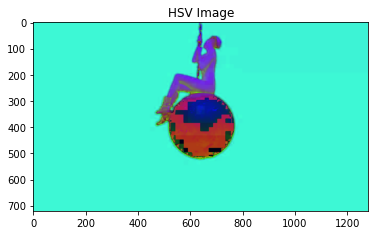

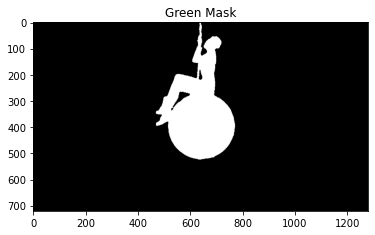

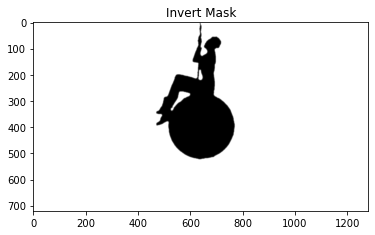

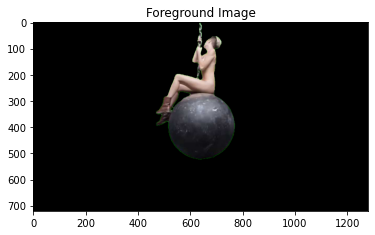

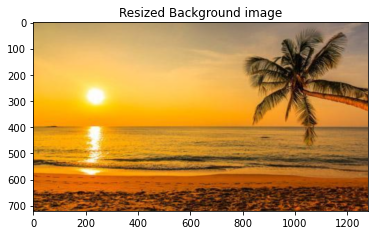

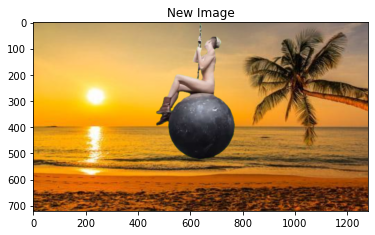

In [4]:
# Chamada do método join_Images
join_Images(img1, img2);